**Analysis owner**: Felipe Matheus <br>
**Date**: 12/10/2021 <br>
**Related Links**:

The objective of this notebook is to asses data from Jeff and create a DataFrame modeling the problem.

# Setup

Libs

In [1]:
import os
import sys
import json
import pandas as pd
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
#import warnings

%load_ext autoreload
%autoreload 2

Modules

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.DataLoader import DataLoader
from src.processing.Processing import Processing
from src.utils import read_files

Variables

In [3]:
pd.options.display.max_rows = 6
# warnings.filterwarnings("ignore")
with open('../config/variables.json') as json_file:
    var = json.load(json_file)
RAW_DATA = var.get('RAW_DATA')
TRAIN_FOLDER = var.get('TRAIN_FOLDER')
TEST_FOLDER = var.get('TEST_FOLDER')

Objects

In [4]:
load = DataLoader(RAW_DATA)
processing = Processing()

# Loading files

In [34]:
fits = load.load_fits(read_files(RAW_DATA))
dfs_dict = processing.get_tabdata_dfs_dict(fits)

KeyboardInterrupt: 

In [11]:
dfs_dict['sp']

,event_num,mult,mult_i,time,pixel,x,y,energy,event_type
0,0,1,0,0.000000,241,1,15,72.422764,1
1,1,1,0,0.214265,78,14,4,76.794589,1
2,2,1,0,0.257149,215,7,13,152.931080,1
...,...,...,...,...,...,...,...,...,...
1304413,-19513,3,0,61444.143172,77,13,4,22.683730,255
1304414,-19512,3,1,61444.143172,95,15,5,65.994951,255
1304415,-19511,3,2,61444.143172,111,15,6,24.178214,255


In [77]:
spectre_header = processing.get_objects(fits['spectre_reveil_calibrated']['tabdata'])


In [85]:
df_sr["label"] = "SR"

/tmp/ipykernel_97971/2660489628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sr["label"] = "SR"


In [87]:
df_sr

,event_num,mult,mult_i,time,pixel,x,y,energy,event_type,label
0,0,1,0,0.000000,241,1,15,72.422764,1,SR
1,1,1,0,0.214265,78,14,4,76.794589,1,SR
2,2,1,0,0.257149,215,7,13,152.931080,1,SR
...,...,...,...,...,...,...,...,...,...,...
1304410,-19516,1,0,61444.001697,173,13,10,59.786638,1,SR
1304411,-19515,1,0,61444.097826,193,1,12,68.281757,1,SR
1304412,-19514,1,0,61444.112442,34,2,2,165.503362,1,SR


In [68]:
type(fitsa['spectre_reveil_calibrated']['header'])

astropy.io.fits.header.Header

o file open é somente isso: 
[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f77318d71c0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f77316f23a0>]

In [30]:
a = [1,2]

In [26]:
a.remove(1)

In [27]:
a

[2]

In [32]:
a.remove(1) if True

SyntaxError: invalid syntax (1970168451.py, line 1)

In [33]:
if True : a.remove(1)

In [ ]:
# todos os arquivos são os dados reais, mas são pas prises pendant
# la meme condition
#Am -> Amerique
# TP8 -> configuration electronique de 1 a 15
# g0 -> outro parâmetro
# BdF -> bruit de fundo. 
# A gente seleciona
#reveil -> alarm


In [15]:
10//3

3

Text(0.5, 1.0, 'Spectre single events')

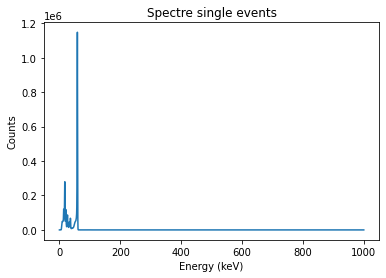

In [4]:
name = data_folder + "Am_proche_TP8_calibrated.fits"
    
hdulist = fits.open(name)

hdr = hdulist[1].header
tabdata = hdulist[1].data
    
hdulist.close()

event_num = tabdata.field("FRAME") #Numéro de l'événement
mult = tabdata.field("MULTIPLICITY") #Multiplicité (nombre de pixels touchés par l'événement)
mult_i = tabdata.field("MULT") #Numéro dans la multiplicité
time = tabdata.field("TIME") #Date de l'événement
pixel = tabdata.field("PIXEL") #Numéro du pixel touché
x = tabdata.field("X") #Coordonnée X du pixel touché
y = tabdata.field("Y") #Coordonnée Y du pixel touché
energy = tabdata.field("ENERGY") #Energie mesurée
event_type = tabdata.field("TYPE") #Ne pas s'occuper de celui-là, la colonne existe mais ne renvoie rien de pertinent

single = (mult == 1)

single_energy = energy[single]

spectre, bins = np.histogram(single_energy,range = (0,1000),bins = 2000)

plt.plot(bins[:-1],spectre)
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.title("Spectre single events")


Text(0.5, 1.0, 'Spectre single events')

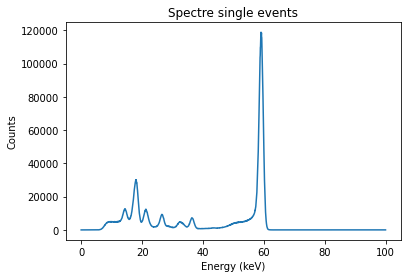

In [6]:
name = data_folder + "Am_proche_TP8_calibrated.fits"
    
hdulist = fits.open(name)

hdr = hdulist[1].header
tabdata = hdulist[1].data
    
hdulist.close()

event_num = tabdata.field("FRAME") #Numéro de l'événement
mult = tabdata.field("MULTIPLICITY") #Multiplicité (nombre de pixels touchés par l'événement)
mult_i = tabdata.field("MULT") #Numéro dans la multiplicité
time = tabdata.field("TIME") #Date de l'événement
pixel = tabdata.field("PIXEL") #Numéro du pixel touché
x = tabdata.field("X") #Coordonnée X du pixel touché
y = tabdata.field("Y") #Coordonnée Y du pixel touché
energy = tabdata.field("ENERGY") #Energie mesurée
event_type = tabdata.field("TYPE") #Ne pas s'occuper de celui-là, la colonne existe mais ne renvoie rien de pertinent

single = (mult == 1)

single_energy = energy[single]

spectre, bins = np.histogram(single_energy,range = (0,100),bins = 2000)

plt.plot(bins[:-1],spectre)
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.title("Spectre single events")


In [ ]:
on reste avec la multiplicite 1, e melanja com o americium e barium
mistrurar os bagulhos e dai dizer quais que tem
pega esse espectro bonitao, melanja com o dos radioativos 

faz uma coisa parecida com o hotel unico, mistura os espectros com uma porcentagem aleatoria
identifica quais espectros eu to misturando, labeliza eles e depois bota pra treinar. Socalhe AutoMLl

Text(0.5, 1.0, 'Spectre single events')

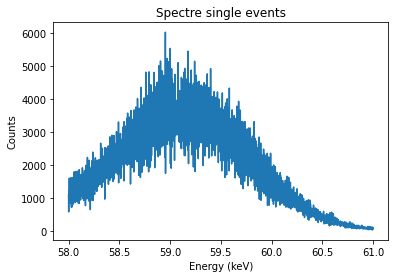

In [7]:
name = data_folder + "Am_proche_TP8_calibrated.fits"
    
hdulist = fits.open(name)

hdr = hdulist[1].header
tabdata = hdulist[1].data
    
hdulist.close()

event_num = tabdata.field("FRAME") #Numéro de l'événement
mult = tabdata.field("MULTIPLICITY") #Multiplicité (nombre de pixels touchés par l'événement)
mult_i = tabdata.field("MULT") #Numéro dans la multiplicité
time = tabdata.field("TIME") #Date de l'événement
pixel = tabdata.field("PIXEL") #Numéro du pixel touché
x = tabdata.field("X") #Coordonnée X du pixel touché
y = tabdata.field("Y") #Coordonnée Y du pixel touché
energy = tabdata.field("ENERGY") #Energie mesurée
event_type = tabdata.field("TYPE") #Ne pas s'occuper de celui-là, la colonne existe mais ne renvoie rien de pertinent

single = (mult == 1)

single_energy = energy[single]

spectre, bins = np.histogram(single_energy,range = (58,61),bins = 2000)

plt.plot(bins[:-1],spectre)
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.title("Spectre single events")


In [83]:
pixel

array([ 98,  50,  29, ..., 161,  11, 181], dtype=uint8)

In [84]:
type(pixel)

numpy.ndarray

In [64]:
hdulist = fits.open(name)

hdr = hdulist[1].header
tabdata = hdulist[1].data

In [70]:
tabdata.field("FRAME")

array([    0,     1,     2, ..., 16668, 16669, 16670], dtype=int16)

In [74]:
tabdata

FITS_rec([(    0, 1, 0, 0.00000000e+00,  98,  2,  6,   1, 58.56808924),
          (    1, 1, 0, 5.86748123e-04,  50,  2,  3,   1, 59.71696083),
          (    2, 1, 0, 8.69750977e-04,  29, 13,  1,   1, 17.71015428),
          ...,
          (16668, 1, 0, 1.79941160e+03, 161,  1, 10,   1, 36.1971228 ),
          (16669, 2, 0, 1.79941168e+03,  11, 11,  0, 255, 57.3391494 ),
          (16670, 2, 1, 1.79941168e+03, 181,  5, 11, 255, 50.0167746 )],
         dtype=(numpy.record, [('FRAME', '>i2'), ('MULTIPLICITY', 'u1'), ('MULT', 'u1'), ('TIME', '>f8'), ('PIXEL', 'u1'), ('X', '>i2'), ('Y', '>i2'), ('TYPE', '>i2'), ('ENERGY', '>f8')]))

In [88]:
type(tabdata)

astropy.io.fits.fitsrec.FITS_rec

In [79]:
len(energy)

14642057

In [80]:
len(energy[single])

9220770

In [ ]:
type(energy

numpy.ndarray

In [85]:
tabdata

FITS_rec([(    0, 1, 0, 0.00000000e+00,  98,  2,  6,   1, 58.56808924),
          (    1, 1, 0, 5.86748123e-04,  50,  2,  3,   1, 59.71696083),
          (    2, 1, 0, 8.69750977e-04,  29, 13,  1,   1, 17.71015428),
          ...,
          (16668, 1, 0, 1.79941160e+03, 161,  1, 10,   1, 36.1971228 ),
          (16669, 2, 0, 1.79941168e+03,  11, 11,  0, 255, 57.3391494 ),
          (16670, 2, 1, 1.79941168e+03, 181,  5, 11, 255, 50.0167746 )],
         dtype=(numpy.record, [('FRAME', '>i2'), ('MULTIPLICITY', 'u1'), ('MULT', 'u1'), ('TIME', '>f8'), ('PIXEL', 'u1'), ('X', '>i2'), ('Y', '>i2'), ('TYPE', '>i2'), ('ENERGY', '>f8')]))

In [86]:
type(tabdata)

astropy.io.fits.fitsrec.FITS_rec

In [ ]:
        # for file in files:
        #     hdulist = fits.open(self.folder+file)
        #     ans[f"{file.lower()}_header"]= hdulist[1].header
        #     ans[f"{file.lower()}_tabdata"]= hdulist[1].data
        #     hdulist.close()

        # return ans
